In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.output {font-size:10pt;}
div.input {font-family:Consolas; font-size:10pt; font-weight:bold;}}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import requests, time
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from html_table_parser import parser_functions as parser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import warnings 
warnings.filterwarnings(action='ignore')

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 0. 위키피디아 사이트에 있는 '대한민국의 역대 음반판매량' 표 크롤링
**역대 한국 대중가요 음반판매량**

In [3]:
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%97%AD%EB%8C%80_%EC%9D%8C%EB%B0%98_%ED%8C%90%EB%A7%A4%EB%9F%89_%EC%88%9C%EC%9C%84_%EB%AA%A9%EB%A1%9D'
chart = requests.get(url)
soup = BeautifulSoup(chart.content, 'html.parser')
table = soup.find_all('table', attrs={'class':'wikitable'})
album_chart = parser.make2d(table[0])
album_chart = pd.DataFrame(album_chart[1:], columns=album_chart[0])
album_chart

,순위,가수,음반,발매 연도,판매량
0,01,방탄소년단,MAP OF THE SOUL : 7,2020,"4,476,006+"
1,02,방탄소년단,MAP OF THE SOUL : PERSONA,2019,"4,021,771+"
2,03,방탄소년단,BE,2020,"3,641,842+"
3,04,김건모,잘못된 만남,1995,"3,300,000+"
4,05,조관우,Memory,1995,"3,000,000+"
5,06,방탄소년단,LOVE YOURSELF 結 'Answer',2018,"2,847,531+"
6,07,조성모,Let Me Love,2000,"2,700,000+"
7,08,조성모,For Your Soul,1999,"2,600,000+"
8,09,신승훈,나보다 조금 더 높은 곳에 니가 있을 뿐,1996,"2,470,000+"
9,10,방탄소년단,LOVE YOURSELF 轉 'Tear',2018,"2,464,530+"


**연도별 100만장 이상 팔린 음반의 수**

In [76]:
# 연도별 오름차순 
album_chart_year = album_chart.groupby(['발매 연도'])['판매량'].count().to_frame().sort_values(
    by='발매 연도')
album_chart_year = album_chart_year.reset_index()
album_chart_year

,발매 연도,판매량
0,1989,1
1,1990,1
2,1991,1
3,1992,3
4,1993,3
5,1994,2
6,1995,2
7,1996,3
8,1997,1
9,1998,2


In [77]:
# 1990년대 밀리언셀링
df1990 = album_chart_year.iloc[0:11, :]
df1990

,발매 연도,판매량
0,1989,1
1,1990,1
2,1991,1
3,1992,3
4,1993,3
5,1994,2
6,1995,2
7,1996,3
8,1997,1
9,1998,2


Text(0.5, 1.0, '1990년대 판매량 100만장을 초과하는 음반 수')

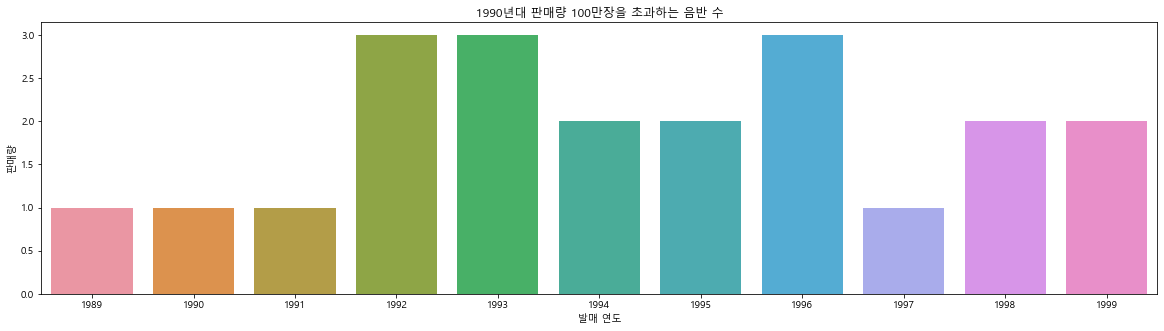

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(x='발매 연도', y='판매량', data=df1990)
plt.title('1990년대 판매량 100만장을 초과하는 음반 수')

In [7]:
# 2000년 이후 밀리언 셀링
df2000 = album_chart_year.iloc[11:17, :]
df2000

,발매 연도,판매량
11,2000,3
12,2001,4
13,2016,1
14,2017,2
15,2018,3
16,2019,1


Text(0.5, 1.0, '2000년 이후 판매량 100만장을 초과하는 음반 수')

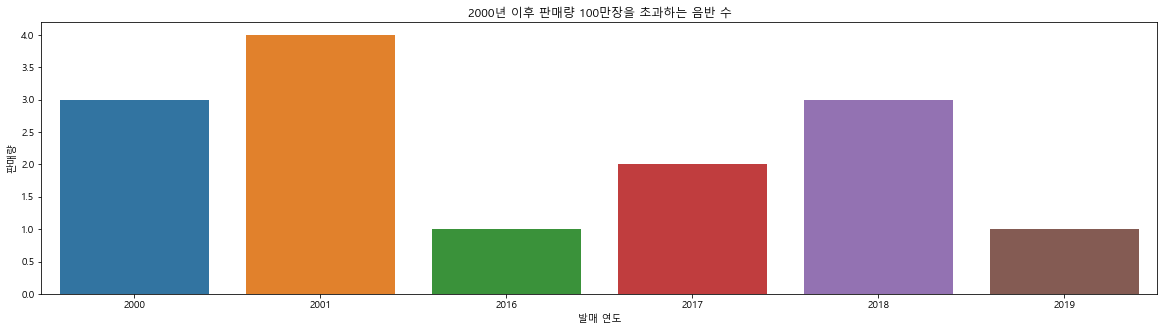

In [8]:
plt.figure(figsize=(20,5))
sns.barplot(x='발매 연도', y='판매량', data=df2000)
plt.title('2000년 이후 판매량 100만장을 초과하는 음반 수')

In [9]:
# 판매량별 내림차순 
album_chart_sold = album_chart.groupby(['발매 연도'])['판매량'].count().to_frame().sort_values(
    by='판매량', ascending=False)
album_chart_sold = album_chart_sold.reset_index()
album_chart_sold = album_chart_sold.head(10)

Text(0.5, 1.0, '연도별 판매량 100만장을 초과하는 음반 수가 가장 많은 해 top10')

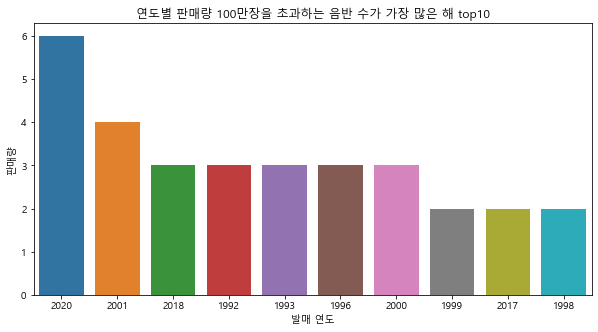

In [10]:
# 음반 판매량 100만장을 넘는 음반 수가 가장 많은 해 top10
plt.figure(figsize=(10,5))
sns.barplot(x='발매 연도', y='판매량', data=album_chart_sold)
plt.title('연도별 판매량 100만장을 초과하는 음반 수가 가장 많은 해 top10')

In [ ]:
# 2002~2015년까지 음반 판매량이 100만장을 초과하지 못하는 이유? 
# 음원 스트리밍 산업이 급부상한 시대임에도 2016~2020년에 100만장 이상을 기록한 음반 수가 최다인 이유?

# 1. 2002이후의 음반 시장 상황 분석하기

**2002년 음반시장 관련 기사들 워드클라우딩**

In [11]:
with open('data/2002년 음반시장 검색 결과 기사.txt' , 'r', encoding='utf-8') as news:
    text = news.read()
text

'올해도 대중음악계는 추웠다. 음반 판매량이 저조해 시장이 위축된 상태에서 검찰의 PR비 수사로 가요계는 얼어붙었다. \n소리바다 사용중지 가처분 신청으로 저작권 논쟁이 뜨거웠던 것도 음반시장 불황과 맞물린 사건으로 주목받았다. \n록밴드의 인기는 올해 두드러진 현상으로 환영받았다. 2002년 대중음악계의 4대 이슈를 되돌아본다.\n불황에 비리파문까지 얼어붙은 음반시장\n◇소리바다 사용중지 가처분 신청=2002년 7월 9일 수원지방법원 성남지원이 MP3 음악 파일 공유 프로그램인 \n\'소리바다\'(www.soribada.com)에 대해 서비스 중지 가처분 결정을 내렸다. \n2001년 1월 음반사들이 소리바다의 운영자를 고소하고, 그해 8월 검찰이 소리바다를 기소한 이후 최초로 내려진 법원의 판결이었다.\n법원은 이용자들이 소리바다의 서버를 이용해 음악 파일을 교환하는 것은 저작권 침해라고 판단했다. \n그러나 소리바다는 중앙서버를 거치지 않는 새로운 방식으로 법망을 피해 서비스를 재개했다. \n음반산업협회는 다음카페 등 다른 음반 사이트의 서비스 중단도 요구하고 있지만 단속을 위한 근거법이 \n정보기술의 발전을 따라가지 못해 실효는 거두지 못하고 있다.\n◇PR비 수사=올해 7월 초 시작된 가요계 PR비 비리 수사는 방송가를 중심으로 연예산업에 적지 않은 파문을 일으켰다. \n방송·연예 기획사 관계자와 일부 연예담당 기자 등이 구속됨으로써 일단락됐다. 이 사건은 방송 권력과 \n연예산업간 구조적 유착관계의 실상을 그대로 드러냈다.\n이에 대해 방송이 대중음악 시장을 좌지우지하는 기형적인 구조를 개선해야 한다는 대안이 호소력을 얻었다. \n대중음악이 질 높은 시장으로 거듭나기 위해서는 보다 투명한 시장 구조의 개선이 필요하다는 지적이다.\n◇록밴드 인기=월드컵 열기에 힘입어 거리 응원에서 록밴드들이 인기를 모으기 시작했다. 음성적인 PR비 관행으로 \n고통을 겪은 기획사들이 방송 홍보에 매달리지 않고 무대활동만으로도 생존이 가능한 록밴드로 관심을 돌리기도 했

In [12]:
from konlpy.tag import Kkma
kkma = Kkma()

In [13]:
sentences = kkma.sentences(text)
print(sentences)

['올해도 대중 음악계는 추웠다.', '음반 판매량이 저조해 시장이 위축된 상태에서 검찰의 PR 비 수사로 가요계는 얼어붙었다.', '소리 바다 사용 중지 가처분 신청으로 저작권 논쟁이 뜨거웠던 것도 음반시장 불황과 맞물린 사건으로 주목받았다.', '록 밴드의 인기는 올해 두드러진 현상으로 환영 받았다.', '2002년 대중음악계의 4대 이슈를 되돌아본다.', "불황에 비리 파문까지 얼어붙은 음반시장 ◇ 소리 바다 사용 중지 가처분 신청 =2002 년 7월 9일 수원지방법원 성남지원이 MP3 음악 파일 공유 프로그램인 ' 소리 바다' (www .soribada .com )에 대해 서비스 중지 가처분 결정을 내렸다.", '2001년 1월 음반사들이 소리 바다의 운영자를 고소하고, 그해 8월 검찰이 소리 바다를 기소한 이후 최초로 내려진 법원의 판결이었다.', '법원은 이용자들이 소리 바다의 서버를 이용해 음악 파일을 교환하는 것은 저작권 침해라고 판단했다.', '그러나 소리 바다는 중앙 서버를 거치지 않는 새로운 방식으로 법망을 피해 서비스를 재개했다.', '음반산업협회는 다음 카페 등 다른 음반 사이트의 서비스 중단도 요구하고 있지만 단속을 위한 근거 법이 정보기술의 발전을 따라가지 못해 실효는 거두지 못하고 있다.', '◇PR 비 수사= 올해 7월 초 시작된 가요계 PR 비 비리 수사는 방송가를 중심으로 연예산업에 적지 않은 파문을 일으켰다.', '방송· 연예 기획사 관계자와 일부 연예담당 기자 등이 구속됨으로써 일단락됐다.', '이 사건은 방송 권력과 연예산업 간 구조적 유착관계의 실상을 그대로 드러냈다.', '이에 대해 방송이 대중음악 시장을 좌지우지하는 기형적인 구조를 개선해야 한다는 대안이 호소력을 얻었다.', '대중음악이 질 높은 시장으로 거듭나기 위해서는 보다 투명한 시장 구조의 개선이 필요 하다는 지적이다.', '◇ 록 밴드 인기= 월드컵 열기에 힘입어 거리 응원에서 록 밴드들이 인기를 모으기 시작했다.', '음성적인 PR 비 관행으로 고통을 겪

In [14]:
stopwords = STOPWORDS | ENGLISH_STOP_WORDS | set ([
    '대중음악', '대중음악계', '가요계', '음반시장', '규모는', 
    '따르면', '전병헌', '의원은', '음악계', '2002년', '판매량', 
    '지난해', '것으로', '2001년', '2005년'])
wordc = WordCloud(background_color='white', 
                  max_words=100, 
                  font_path ='c:/Windows/fonts/malgun.ttf',
                  relative_scaling=0.2,
                  min_word_length=3,
                  stopwords = stopwords)
wordc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

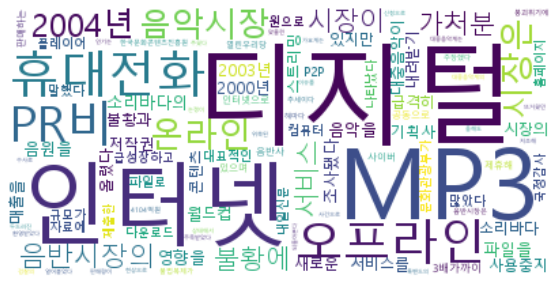

In [15]:
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

**음악분야의 불법복제물 유통량과 경험률**

In [16]:
# 불법복제물 유통량 
illegal_distribution = pd.read_csv('loaded data/한국저작권보호원_콘텐츠별 불법복제물 유통량(08년_17년).csv',
                                  encoding='CP949')
illegal_distribution

,구분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,음악분야 불법복제물 유통량,2555927,1767265,1120035,1291569,1327019,1662420,1509763,1270686,1522608,1297379
1,영화분야 불법복제물 유통량,349364,228451,240043,251456,214878,237474,234349,245908,257580,229281
2,방송분야 불법복제물 유통량,271301,210601,350501,350585,358058,347378,377498,461584,517384,471951
3,출판분야 불법복제물 유통량,211078,135956,159354,173601,139065,134661,112586,81443,57555,61473
4,게임분야 불법복제물 유통량,62077,53745,25777,33059,25311,25486,26807,28946,25818,23026


In [17]:
illegal_distribution.columns

Index(['구분', '2008년', '2009년', '2010년', '2011년', '2012년', '2013년', '2014년',
       '2015년', '2016년', '2017년'],
      dtype='object')

In [18]:
distribution_year = illegal_distribution.loc[:, '2008년':'2017년']
distribution_year

,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,2555927,1767265,1120035,1291569,1327019,1662420,1509763,1270686,1522608,1297379
1,349364,228451,240043,251456,214878,237474,234349,245908,257580,229281
2,271301,210601,350501,350585,358058,347378,377498,461584,517384,471951
3,211078,135956,159354,173601,139065,134661,112586,81443,57555,61473
4,62077,53745,25777,33059,25311,25486,26807,28946,25818,23026


In [19]:
# 분야별 평균 유통량을 구하여 그래프로 출력
distribution_mean = distribution_year.apply(np.mean, axis=1).to_frame()

In [20]:
distribution_mean = distribution_mean.apply(np.round).astype('int')
distribution_mean.columns=['평균']
distribution_mean

,평균
0,1532467
1,248878
2,371684
3,126677
4,33005


In [21]:
illegal_distribution = pd.concat([illegal_distribution, distribution_mean], axis=1)
illegal_distribution

,구분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,평균
0,음악분야 불법복제물 유통량,2555927,1767265,1120035,1291569,1327019,1662420,1509763,1270686,1522608,1297379,1532467
1,영화분야 불법복제물 유통량,349364,228451,240043,251456,214878,237474,234349,245908,257580,229281,248878
2,방송분야 불법복제물 유통량,271301,210601,350501,350585,358058,347378,377498,461584,517384,471951,371684
3,출판분야 불법복제물 유통량,211078,135956,159354,173601,139065,134661,112586,81443,57555,61473,126677
4,게임분야 불법복제물 유통량,62077,53745,25777,33059,25311,25486,26807,28946,25818,23026,33005


In [22]:
illegal_distribution['구분'] = illegal_distribution['구분'].apply(lambda x: x.replace('분야 불법복제물 유통량', ''))

In [23]:
illegal_distribution

,구분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,평균
0,음악,2555927,1767265,1120035,1291569,1327019,1662420,1509763,1270686,1522608,1297379,1532467
1,영화,349364,228451,240043,251456,214878,237474,234349,245908,257580,229281,248878
2,방송,271301,210601,350501,350585,358058,347378,377498,461584,517384,471951,371684
3,출판,211078,135956,159354,173601,139065,134661,112586,81443,57555,61473,126677
4,게임,62077,53745,25777,33059,25311,25486,26807,28946,25818,23026,33005


In [24]:
illegal_music = illegal_distribution.head(1)
illegal_music

,구분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,평균
0,음악,2555927,1767265,1120035,1291569,1327019,1662420,1509763,1270686,1522608,1297379,1532467


In [25]:
illegal_music_melted = illegal_music.melt(id_vars=['구분'], 
                                          var_name='연도',
                                          value_name='유통량') 
illegal_music_melted = illegal_music_melted.iloc[:-1, :] 
illegal_music_melted

,구분,연도,유통량
0,음악,2008년,2555927
1,음악,2009년,1767265
2,음악,2010년,1120035
3,음악,2011년,1291569
4,음악,2012년,1327019
5,음악,2013년,1662420
6,음악,2014년,1509763
7,음악,2015년,1270686
8,음악,2016년,1522608
9,음악,2017년,1297379


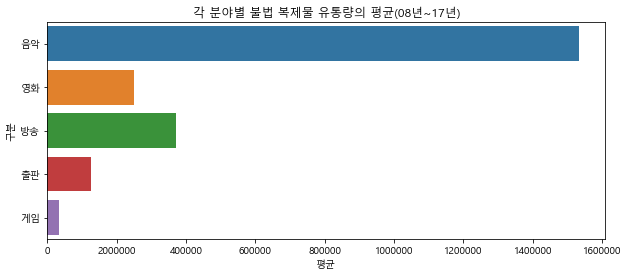

In [26]:
# 연도별 유통량을 분야별로 그래프로출력 
plt.figure(figsize=(10,4))
dis_bar = sns.barplot(x='평균', y='구분', data = illegal_distribution)
dis_bar.set(xticklabels=[0, 2000000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000])
dis_bar.set(title='각 분야별 불법 복제물 유통량의 평균(08년~17년)')
dis_bar
plt.show()

In [27]:
# 불법복제물 경험률
illegal_use = pd.read_csv('loaded data/한국저작권보호원_콘텐츠별 온라인 불법복제물 경험률(08년_17년).csv',
                          encoding='CP949')
illegal_use

,구 분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,음악분야 온라인 불법복제물 경험률,40.7,24.1,19.5,19.0,17.0,17.9,22.2,17.9,20.3,16.6
1,영화분야 온라인 불법복제물 경험률,36.7,23.0,20.3,18.7,18.3,19.0,21.5,20.1,22.3,17.2
2,방송분야 온라인 불법복제물 경험률,20.4,14.1,14.5,14.0,14.3,13.8,16.0,18.8,21.4,20.8
3,출판분야 온라인 불법복제물 경험률,10.1,6.4,5.7,5.3,4.4,5.8,5.1,4.8,4.7,4.4
4,게임분야 온라인 불법복제물 경험률,15.7,9.3,4.6,4.4,3.8,4.5,7.2,7.5,7.1,6.5


In [28]:
illegal_use['구 분'] = illegal_use['구 분'].apply(lambda x: x.replace('분야 온라인 불법복제물 경험률', ''))

In [29]:
illegal_use_music = illegal_use.head(1)
illegal_use_music

,구 분,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년
0,음악,40.7,24.1,19.5,19.0,17.0,17.9,22.2,17.9,20.3,16.6


In [30]:
use_music_melted = illegal_use_music.melt(id_vars=['구 분'], 
                                          var_name='연도',
                                          value_name='경험률') 
use_music_melted 

,구 분,연도,경험률
0,음악,2008년,40.7
1,음악,2009년,24.1
2,음악,2010년,19.5
3,음악,2011년,19.0
4,음악,2012년,17.0
5,음악,2013년,17.9
6,음악,2014년,22.2
7,음악,2015년,17.9
8,음악,2016년,20.3
9,음악,2017년,16.6


In [31]:
use_music_melted.drop(columns=['구 분', '연도'], axis=1, inplace=True)

In [32]:
use_music_melted

,경험률
0,40.7
1,24.1
2,19.5
3,19.0
4,17.0
5,17.9
6,22.2
7,17.9
8,20.3
9,16.6


In [34]:
music_damage = pd.concat([illegal_music_melted, use_music_melted], axis=1)
music_damage

,구분,연도,유통량,경험률
0,음악,2008년,2555927,40.7
1,음악,2009년,1767265,24.1
2,음악,2010년,1120035,19.5
3,음악,2011년,1291569,19.0
4,음악,2012년,1327019,17.0
5,음악,2013년,1662420,17.9
6,음악,2014년,1509763,22.2
7,음악,2015년,1270686,17.9
8,음악,2016년,1522608,20.3
9,음악,2017년,1297379,16.6


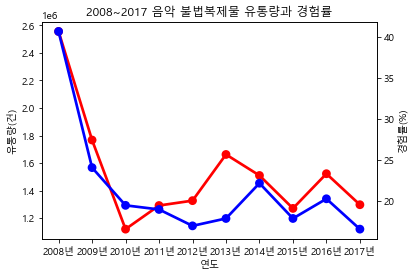

In [35]:
## 위의 표로 x축을 공유하는 그래프 만들기
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

sns.pointplot(x='연도', y='유통량', data=music_damage, ax=ax1, color='r')
sns.pointplot(x='연도', y='경험률', data=music_damage, ax=ax2, color='b')

ax1.set(ylabel='유통량(건)')
ax2.set(ylabel='경험률(%)')

plt.title('2008~2017 음악 불법복제물 유통량과 경험률')
plt.savefig('시각화자료/2008~2017 음악 불법복제물 유통량과 경험률.png')
plt.show()

### 각 밀리언셀러 음반들의 대표곡과 장르 분석 

In [36]:
album_chart.head()

,순위,가수,음반,발매 연도,판매량
0,01,방탄소년단,MAP OF THE SOUL : 7,2020,"4,376,975+"
1,02,방탄소년단,MAP OF THE SOUL : PERSONA,2019,"3,915,766+"
2,03,김건모,잘못된 만남,1995,"3,300,000+"
3,04,조관우,Memory,1995,"3,000,000+"
4,05,방탄소년단,LOVE YOURSELF 結 'Answer',2018,"2,731,330+"


In [37]:
album_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      41 non-null     object
 1   가수      41 non-null     object
 2   음반      41 non-null     object
 3   발매 연도   41 non-null     object
 4   판매량     41 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


<Figure size 1440x576 with 0 Axes>

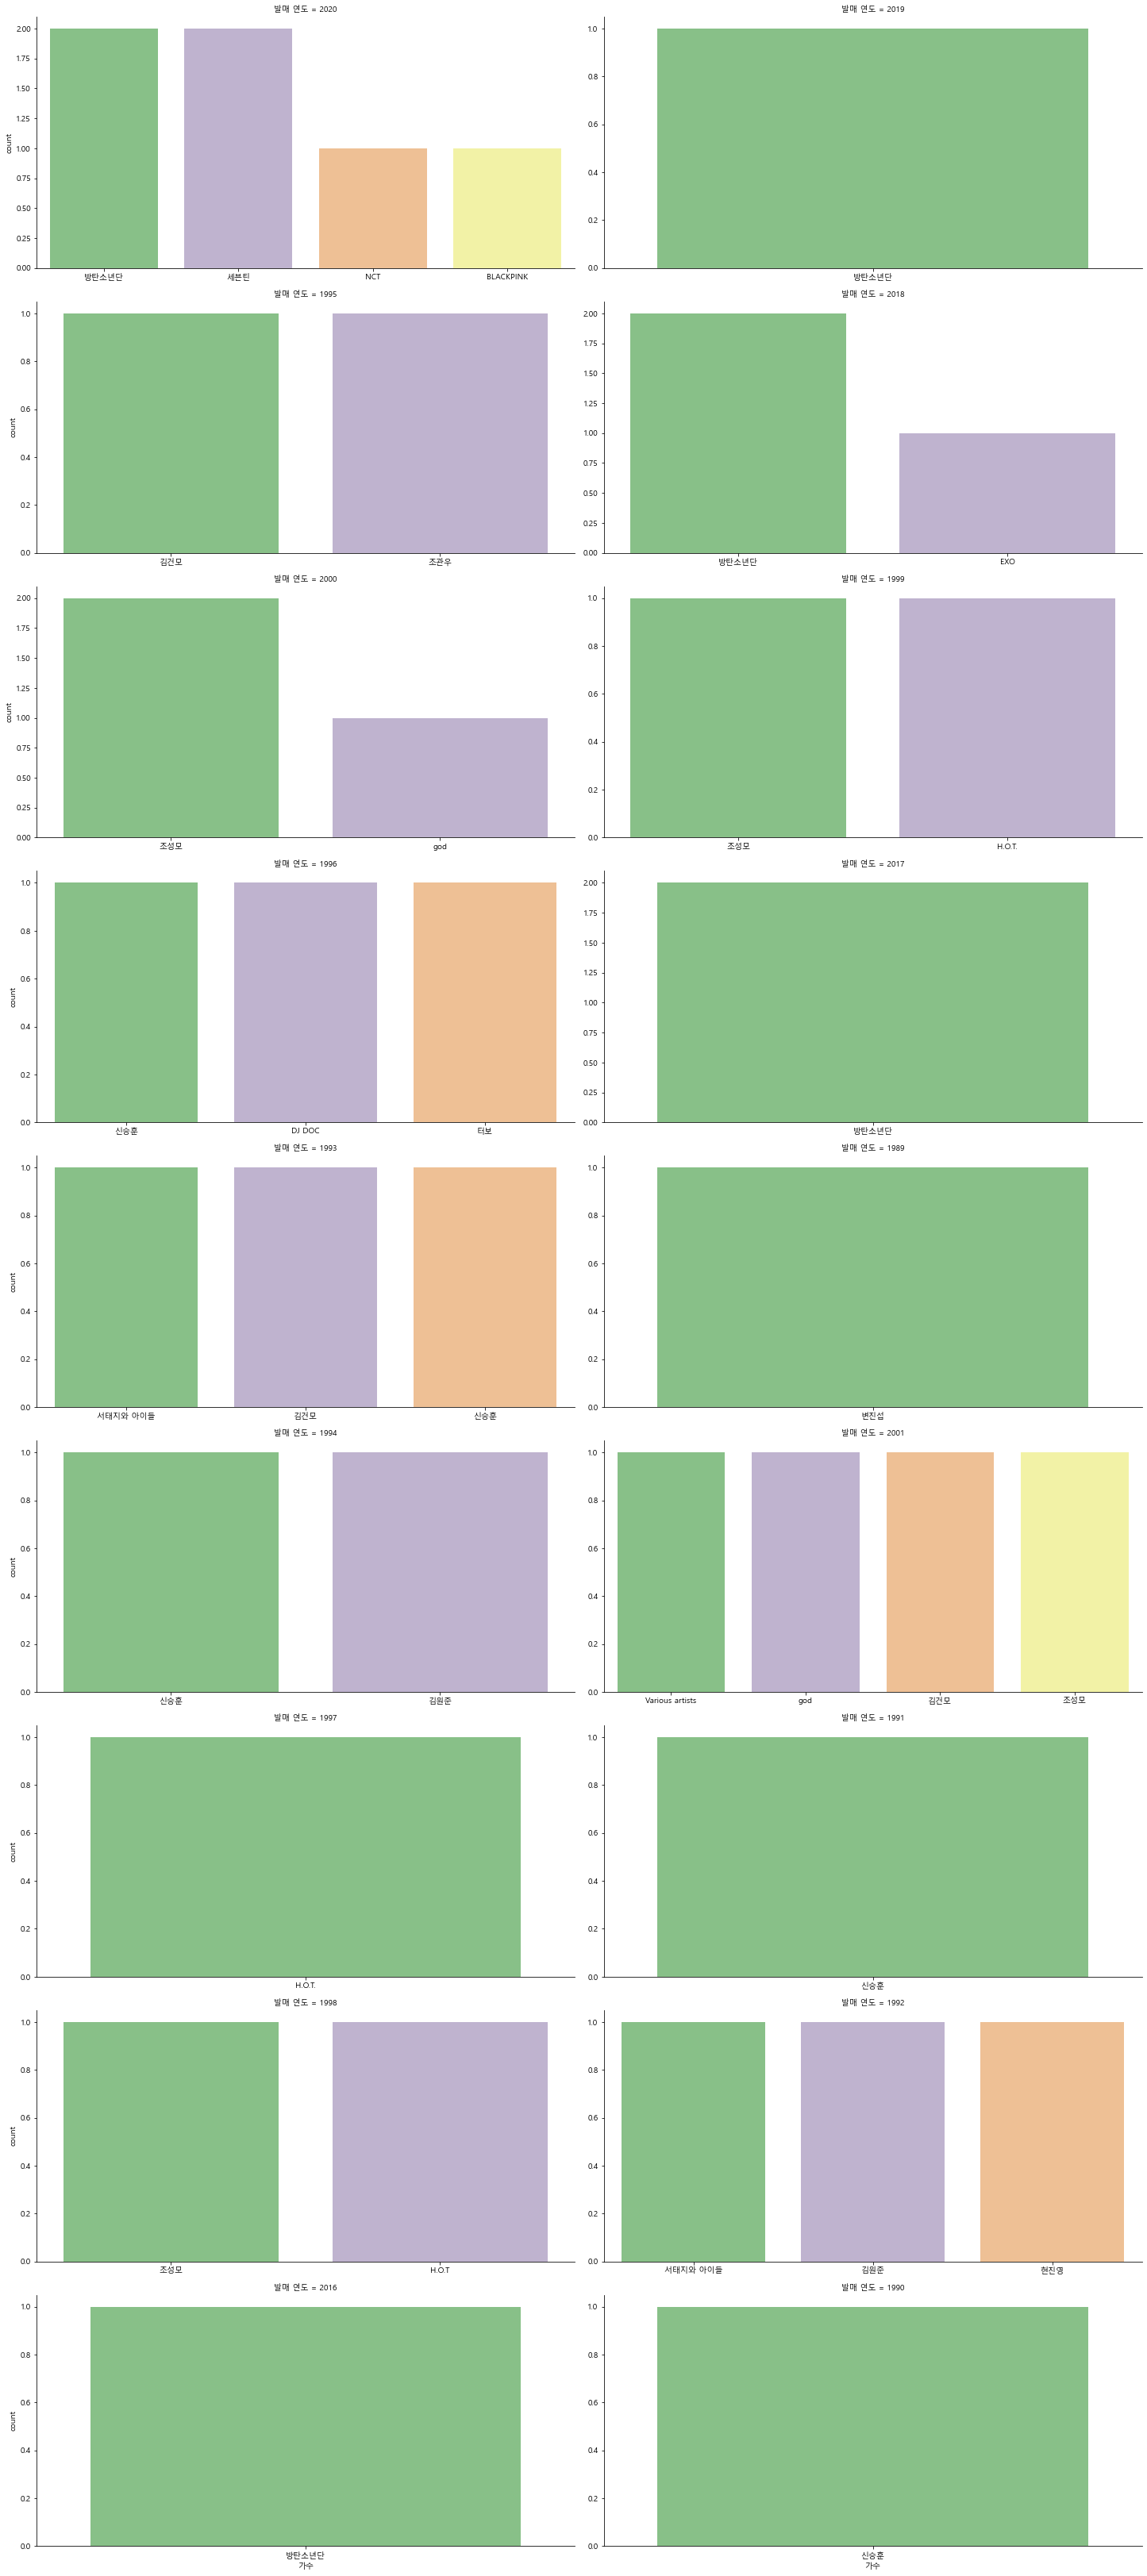

In [38]:
plt.figure(figsize=(20,8))
sns.catplot(data=album_chart, x='가수', kind='count', 
            col='발매 연도', col_wrap=2,
            sharey=False, sharex=False, aspect=2, palette='Accent')

plt.savefig('data/연도별 밀리언셀러의 밀리언음반 수.png')

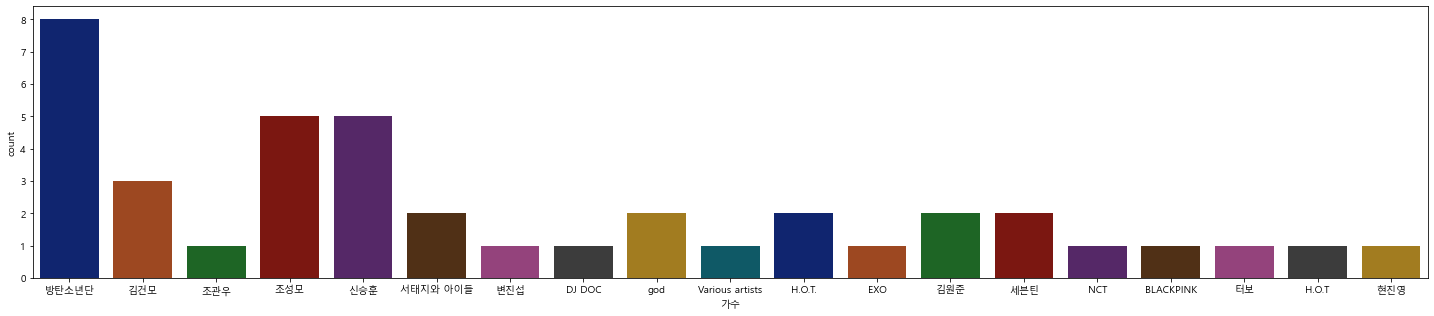

In [39]:
plt.figure(figsize=(25,5))
sns.countplot(x='가수', data=album_chart, palette='dark')
plt.savefig('시각화자료/밀리언셀러밀리언음반수.png')

In [40]:
# '발매 연도' 컬럼의 데이터들 형변환하기 
album_chart['발매 연도'] = pd.to_numeric(album_chart['발매 연도'], errors='coerce')

In [41]:
album_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      41 non-null     object
 1   가수      41 non-null     object
 2   음반      41 non-null     object
 3   발매 연도   41 non-null     int64 
 4   판매량     41 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


In [42]:
# 데이터 불러오기 
song_genre = pd.read_excel('data/각 밀리언셀러 음반별 대표곡의 장르.xlsx')
song_genre

,Rank,Musician,Song Title,Genre
0,1,BTS,ON,Dance
1,2,BTS,작은 것들을 위한 시(Boy With Luv)(Feat. Halsey),Dance
2,3,김건모,잘못된 만남,Dance
3,4,조관우,꽃밭에서,Ballad
4,5,BTS,IDOL,Dance
5,6,조성모,아시나요,Ballad
6,7,BTS,Life goes on,Dance
7,8,조성모,For Your Soul (슬픈 영혼식),Ballad
8,9,신승훈,나보다 조금 더 높은 곳에 니가 있을 뿐,Ballad
9,10,BTS,FAKE LOVE,Dance


In [45]:
# 특정 컬럼 삭제 
song_genre.drop(columns=['Rank', 'Musician'], axis=1, inplace=True)

In [43]:
song_genre

,Rank,Musician,Song Title,Genre
0,1,BTS,ON,Dance
1,2,BTS,작은 것들을 위한 시(Boy With Luv)(Feat. Halsey),Dance
2,3,김건모,잘못된 만남,Dance
3,4,조관우,꽃밭에서,Ballad
4,5,BTS,IDOL,Dance
5,6,조성모,아시나요,Ballad
6,7,BTS,Life goes on,Dance
7,8,조성모,For Your Soul (슬픈 영혼식),Ballad
8,9,신승훈,나보다 조금 더 높은 곳에 니가 있을 뿐,Ballad
9,10,BTS,FAKE LOVE,Dance


In [44]:
# concat 
album_genre = pd.concat([album_chart, song_genre], axis=1)
album_genre.head()

,순위,가수,음반,발매 연도,판매량,Rank,Musician,Song Title,Genre
0,01,방탄소년단,MAP OF THE SOUL : 7,2020,"4,376,975+",1,BTS,ON,Dance
1,02,방탄소년단,MAP OF THE SOUL : PERSONA,2019,"3,915,766+",2,BTS,작은 것들을 위한 시(Boy With Luv)(Feat. Halsey),Dance
2,03,김건모,잘못된 만남,1995,"3,300,000+",3,김건모,잘못된 만남,Dance
3,04,조관우,Memory,1995,"3,000,000+",4,조관우,꽃밭에서,Ballad
4,05,방탄소년단,LOVE YOURSELF 結 'Answer',2018,"2,731,330+",5,BTS,IDOL,Dance


In [45]:
# 데이터프레임 연도 순으로 정렬 
album_genre = album_genre.sort_values('발매 연도')
album_genre

,순위,가수,음반,발매 연도,판매량,Rank,Musician,Song Title,Genre
12,13,변진섭,너에게로 또 다시,1989,"1,980,000+",13,변진섭,너에게로 또 다시,Ballad
34,35,신승훈,미소 속에 비친 그대,1990,"1,210,000+",35,신승훈,미소 속에 비친 그대,Ballad
22,23,신승훈,보이지 않는 사랑,1991,"1,470,000+",23,신승훈,보이지 않는 사랑,Ballad
40,41,현진영,흐린 기억 속의 그대,1992,"1,080,000+",41,현진영,흐린 기억 속의 그대,Dance
38,39,김원준,모두 잠든 후에,1992,"1,140,000+",39,김원준,모두 잠든 후에,Dance
30,31,서태지와 아이들,서태지와 아이들 1집,1992,"1,330,000+",31,서태지와 아이들,난 알아요,Dance
15,16,김건모,핑계,1993,"1,820,000+",16,김건모,핑계,Dance
11,12,서태지와 아이들,서태지와 아이들 2집,1993,"2,200,000+",12,서태지와 아이들,하여가(何如歌),Dance
20,21,신승훈,Shin Seung Hun Vol.3,1993,"1,530,000+",21,신승훈,널 사랑하니까,Ballad
25,26,김원준,너 없는 동안,1994,"1,400,000+",26,김원준,너 없는 동안,Dance


In [46]:
# [Genre] 컬럼의 데이터값에서 Ballad를 0, Dance를 1로 데이터값 변경 
album_genre['Genre'].loc[album_genre['Genre'] == 'Ballad'] = 0
album_genre['Genre'].loc[album_genre['Genre'] == 'Dance'] = 1
album_genre

,순위,가수,음반,발매 연도,판매량,Rank,Musician,Song Title,Genre
12,13,변진섭,너에게로 또 다시,1989,"1,980,000+",13,변진섭,너에게로 또 다시,0
34,35,신승훈,미소 속에 비친 그대,1990,"1,210,000+",35,신승훈,미소 속에 비친 그대,0
22,23,신승훈,보이지 않는 사랑,1991,"1,470,000+",23,신승훈,보이지 않는 사랑,0
40,41,현진영,흐린 기억 속의 그대,1992,"1,080,000+",41,현진영,흐린 기억 속의 그대,1
38,39,김원준,모두 잠든 후에,1992,"1,140,000+",39,김원준,모두 잠든 후에,1
30,31,서태지와 아이들,서태지와 아이들 1집,1992,"1,330,000+",31,서태지와 아이들,난 알아요,1
15,16,김건모,핑계,1993,"1,820,000+",16,김건모,핑계,1
11,12,서태지와 아이들,서태지와 아이들 2집,1993,"2,200,000+",12,서태지와 아이들,하여가(何如歌),1
20,21,신승훈,Shin Seung Hun Vol.3,1993,"1,530,000+",21,신승훈,널 사랑하니까,0
25,26,김원준,너 없는 동안,1994,"1,400,000+",26,김원준,너 없는 동안,1


In [47]:
# 정렬한 데이터 2002년 이전과 이후로 분리 
chart_before_2002 = album_genre.loc[album_genre['발매 연도'] < 2002, :]
chart_before_2002.sort_values('발매 연도')

,순위,가수,음반,발매 연도,판매량,Rank,Musician,Song Title,Genre
12,13,변진섭,너에게로 또 다시,1989,"1,980,000+",13,변진섭,너에게로 또 다시,0
34,35,신승훈,미소 속에 비친 그대,1990,"1,210,000+",35,신승훈,미소 속에 비친 그대,0
22,23,신승훈,보이지 않는 사랑,1991,"1,470,000+",23,신승훈,보이지 않는 사랑,0
40,41,현진영,흐린 기억 속의 그대,1992,"1,080,000+",41,현진영,흐린 기억 속의 그대,1
38,39,김원준,모두 잠든 후에,1992,"1,140,000+",39,김원준,모두 잠든 후에,1
30,31,서태지와 아이들,서태지와 아이들 1집,1992,"1,330,000+",31,서태지와 아이들,난 알아요,1
15,16,김건모,핑계,1993,"1,820,000+",16,김건모,핑계,1
11,12,서태지와 아이들,서태지와 아이들 2집,1993,"2,200,000+",12,서태지와 아이들,하여가(何如歌),1
20,21,신승훈,Shin Seung Hun Vol.3,1993,"1,530,000+",21,신승훈,널 사랑하니까,0
25,26,김원준,너 없는 동안,1994,"1,400,000+",26,김원준,너 없는 동안,1


In [48]:
chart_after_2002 = album_genre.loc[album_genre['발매 연도'] > 2002, :]
chart_after_2002.sort_values('발매 연도')

,순위,가수,음반,발매 연도,판매량,Rank,Musician,Song Title,Genre
33,34,방탄소년단,WINGS,2016,"1,229,381+",34,BTS,피 땀 눈물,1
37,38,방탄소년단,YOU NEVER WALK ALONE,2017,"1,116,443+",38,BTS,피 땀 눈물,1
10,11,방탄소년단,LOVE YOURSELF 承 'Her',2017,"2,347,120+",11,BTS,DNA,1
9,10,방탄소년단,LOVE YOURSELF 轉 'Tear',2018,"2,349,588+",10,BTS,FAKE LOVE,1
23,24,EXO,DON'T MESS UP MY TEMPO,2018,"1,452,030+",24,EXO,Tempo,1
4,05,방탄소년단,LOVE YOURSELF 結 'Answer',2018,"2,731,330+",5,BTS,IDOL,1
1,02,방탄소년단,MAP OF THE SOUL : PERSONA,2019,"3,915,766+",2,BTS,작은 것들을 위한 시(Boy With Luv)(Feat. Halsey),1
32,33,BLACKPINK,THE ALBUM,2020,"1,244,802+",33,BLACKPINK,Lovesick Girls,1
26,27,세븐틴,SEVENTEEN 7th Mini Album '헹가래',2020,"1,377,813+",27,세븐틴,Left & Right,1
36,37,세븐틴,SEVENTEEN Special Album '; [Semicolon]',2020,"1,122,850+",37,세븐틴,HOME;RUN,1


In [49]:
singer_count_1 = chart_before_2002.groupby(chart_before_2002.가수)['가수'].count().to_frame()
singer_count_1

,가수
가수,
DJ DOC,1
H.O.T,1
H.O.T.,2
Various artists,1
god,2
김건모,3
김원준,2
변진섭,1
서태지와 아이들,2


In [50]:
genre_count_1 = chart_before_2002.groupby(chart_before_2002.Genre)['Genre'].count().to_frame()
genre_count_1

,Genre
Genre,
0,16
1,12


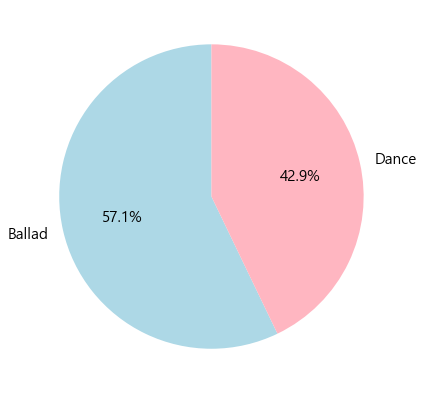

In [51]:
# 2002년 이전 차트 진입한 장르의 비율 시각화 
plt.figure(figsize=(7,7))
colors = ['lightblue', 'lightpink']
labels = ['Ballad', 'Dance']
plt.pie(data = genre_count_1, x='Genre', 
        labels=labels, 
        autopct='%1.1f%%',
        colors=colors,
        startangle = 90,
        textprops={'fontsize':15})
plt.savefig('data/2genres.png')
plt.show()

In [52]:
genre_count_2 = chart_after_2002.groupby(chart_after_2002.Genre)['Genre'].count().to_frame()
genre_count_2

,Genre
Genre,
1,13


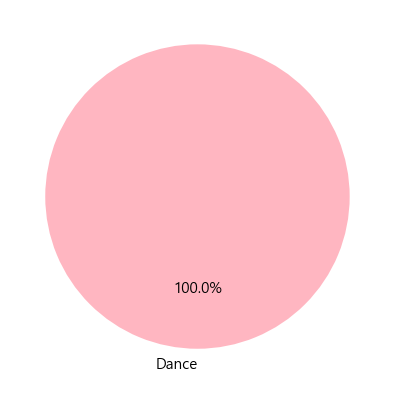

In [53]:
plt.figure(figsize=(7,7))
colors = ['lightpink']
labels = ['Dance']
plt.pie(data = genre_count_2, x='Genre', 
        labels=labels, 
        autopct='%1.1f%%',
        colors=colors,
        startangle = 90,
        textprops={'fontsize':15})
plt.savefig('data/Dance100.png')
plt.show()

**2001 ~ 2020 멜론 발라드 장르 국내종합 연도차트 Top20곡들 중 발라드 곡의 수**

In [54]:
ballad_count = pd.read_excel('data/2001~2020 멜론 발라드 국내종합 연도차트 순위.xlsx')
ballad_count

,연도,음악가,제목,순위
0,2002,성시경,우린 제법 잘 어울려요,2
1,2002,부활,Never Ending Story,3
2,2002,박효신,좋은 사람,5
3,2002,윤도현,사랑 Two,6
4,2002,휘성,안되나요,7
...,...,...,...,...
119,2019,잔나비,주저하는 연인들을 위해,8
120,2020,장범준,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,4
121,2020,노을,늦은 밤 너의 집 앞 골목길에서,7
122,2020,악동뮤지션,"어떻게 이별까지 사랑하겠어, 널 사랑하는 거지",11


In [55]:
ballad_count.groupby('연도')['제목'].count().to_frame()

,제목
연도,
2002,12
2003,12
2004,11
2005,14
2006,12
2007,11
2008,7
2009,3
2010,5


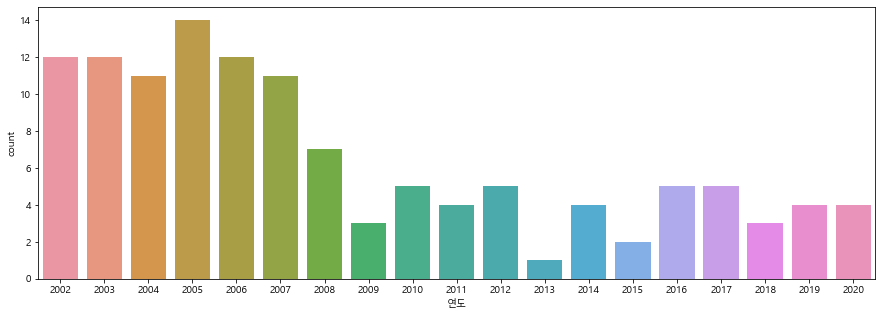

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(x='연도', data=ballad_count)
plt.savefig('시각화자료/멜론 연간 국내종합차트 20위권안에 진입한 발라드 곡의 수.png')

In [70]:
# 90년대 발라드 밀리언셀러들의 20년 이후의 음반활동 (신승훈)
url = "https://www.melon.com/search/album/index.htm?q=%EC%8B%A0%EC%8A%B9%ED%9B%88&section=&searchGnbYn=Y&kkoSpl=N&kkoDpType=&ipath=srch_form"
headers = {'User-agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.content, "html.parser")

album_name = soup.select('div.atist_info a.ellipsis')
album_date = soup.select('dd.wrap_btn span.cnt_view')


for i in range(len(album_type)):
    print('{}. {} / {}'.format(i, album_name[i].text, album_date[i].text))

0. 미스터 션샤인 OST / 2018.10.01
1. 40대를 위한 40곡 / 2010.05.19
2. 슈퍼스타K 2 / 2010.09.28
3. 더 콜 (The Call) 첫 번째 프로젝트 / 2018.05.12
4. 너의 목소리가 들려 OST / 2013.07.30
5. 하얀 겨울 2005 / 2005.12.05
6. 재회(再會) (Remake Special) / 2002.12.01
7. 아이리스 OST / 2009.11.17
8. 불후의 명곡 - 전설을 노래하다 (신승훈 편) / 2020.03.14
9. 엽기적인 그녀 OST / 2001.08.01
10. MY PERSONAS / 2020.04.08
11. 더 콜 (The Call) 네 번째 프로젝트 / 2018.06.22
12. 92' 내일은 늦으리 / 1992.11.01
13. 김현식 추모 10주년 헌정음반 / 2003.11.03
14. 이소라의 프로포즈 2집 / 1999.01.01
15. 더 콜 (The Call) 두 번째 프로젝트 / 2018.05.19
16. 천일의 약속 OST / 2011.11.29
17. 미스터 션샤인 OST Part.12 / 2018.09.09
18. 그 후로 오랫동안... / 1994.09.15
19. Shin Seung Hun Vol.3 / 1993.04.15
20. 보이지 않는 사랑 / 1991.11.30


IndexError: list index out of range

In [71]:
# 90년대 발라드 밀리언셀러들의 20년 이후의 음반활동 (조성모)
url = "https://www.melon.com/search/album/index.htm?q=%EC%A1%B0%EC%84%B1%EB%AA%A8&section=&searchGnbYn=Y&kkoSpl=Y&kkoDpType=&linkOrText=T&ipath=srch_form#params%5Bq%5D=%25EC%25A1%25B0%25EC%2584%25B1%25EB%25AA%25A8&params%5Bsortorder%5D=&params%5Bsection%5D=all&params%5BsectionId%5D=&params%5BgenreDir%5D=&po=pageObj&startIndex=22" 
headers = {'User-agent':'Mozilla/5.0'}
html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.content, "html.parser")

album_name = soup.select('div.atist_info a.ellipsis')
album_date = soup.select('dd.wrap_btn span.cnt_view')


for i in range(len(album_type)):
    print('{}. {} / {}'.format(i, album_name[i].text, album_date[i].text))

0. Classic  / 2000.01.27
1. 90년대 청춘가요모음 열정 (5CD) / 2015.04.21
2. SBS 아카이브 K - 전설의 무대 발라드 Part 1 / 2021.01.04
3. 슈퍼스타K 2 / 2010.09.28
4. No.1 Club 가요 리믹스 / 2005.11.08
5. 뽕숭아학당 PART11 / 2020.07.29
6. 재회(再會) (Remake Special) / 2002.12.01
7. 파리의 연인 OST / 2004.06.25
8. 99 Mix Mac 히트가요 논스톱 / 1999
9. 판타스틱 듀오 Part.3 / 2016.05.08
10. 비와 당신 (Rain And You) / 2014.06.27
11. 김현식 추모 10주년 헌정음반 / 2003.11.03
12. 제3의 매력 (JTBC 금토드라마) Special OST / 2018.11.16
13. Hooxi, The Beginning / 2016.12.22
14. 연인 / 2005.10.10
15. For Your Soul / 1999.09.09
16. Let Me Love / 2000.09.01
17. Ivy Mega Mix 2006 (아이비 메가 믹스 2006) / 2006.08.17
18. 불후의 명곡 - 전설을 노래하다 (우리가 사랑한 밀리언셀러 조성모) / 2019.03.16
19. 락(樂) & Rock / 2001.08.01
20. To Heaven / 1998.09.06


IndexError: list index out of range